In [86]:
#import packages
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import string
import pandas as pd

# Theoretical Codes
# a) Exponential decay plot

In [87]:
#------------------------------------------------------------------------------------------------------------------
# Defining a function to return the number of chain functions for a particular k and P
# No of inputs(k) and Bias(P)
#------------------------------------------------------------------------------------------------------------------

def chain_func_count_biaswise(k,P):
    if k < 1:
        return'Input should be a natural number'
    elif k == 1:
        if P == 1:
            return 2
        elif P == 2:
            return 'There is no chain function with even bias'
        else:
            return 'Bias is not consistent with the value of k'
    else:
        if P%2 == 0:
            return'There is no chain function with even bias'
        elif P > 2**k:
            return'Bias is not consistent with the value of k'
        else:
            bias_boolstring = bin(P)[2:].zfill(k)
            bias_boolstring_new = bias_boolstring[:-1]
            nest_lengths = [len(group) for group in bias_boolstring_new.replace('10', '1,0').replace('01', '0,1').split(',')]
            nest_lengths[-1] = nest_lengths[-1] + 1
            prod_length_fact = math.prod(math.factorial(length) for length in nest_lengths)
            func_count = int((math.factorial(k)/prod_length_fact)*(1+nest_lengths[-1]))
    return func_count 

In [88]:
#Example-The number of chain functions with k=3,P=5
print(chain_func_count_biaswise(3,5))

9


In [89]:
#------------------------------------------------------------------------------------------------------------------
# Defining a function to return the total number of chain functions for a particular k
#------------------------------------------------------------------------------------------------------------------
def tot_chain_count_k_inp(k):
    if k < 1:
        return'Input should be a natural number'
    elif k == 1:
         return 2
    else:
        func_count_list = []
        for ele in range(1,2**(k-1),2):
            func_count = chain_func_count_biaswise(k,ele)
            func_count_list.append(func_count)
        total_count = 2*sum(func_count_list)
    return total_count

In [90]:
#Example-The number of chain functions with k=3
print(tot_chain_count_k_inp(3))

26


In [91]:
#------------------------------------------------------------------------------------------------------------------
# Defining a function to return the number of ncfs for a particular k and P
#------------------------------------------------------------------------------------------------------------------
def NCF_func_count_biaswise(k,P):
    if k < 1:
        return'Input should be a natural number'
    elif k == 1:
        if P == 1:
            return 2
        elif P == 2:
            return 'There is no NCF with even bias'
        else:
            return 'Bias is not consistent with the value of k'
    else:
        if P%2 == 0:
            return'There is no NCF with even bias'
        elif P > 2**k:
            return'Bias is not consistent with the value of k'
        else:
            bias_boolstring = bin(P)[2:].zfill(k)
            bias_boolstring_new = bias_boolstring[:-1]
            nest_lengths = [len(group) for group in bias_boolstring_new.replace('10', '1,0').replace('01', '0,1').split(',')]
            nest_lengths[-1] = nest_lengths[-1] + 1
            prod_length_fact = math.prod(math.factorial(length) for length in nest_lengths)
            func_count = int((math.factorial(k)/prod_length_fact)*(2**k))
    return func_count

In [92]:
#Example-The number of ncf with k=3,P=5
print(NCF_func_count_biaswise(3,5))

24


In [93]:
#------------------------------------------------------------------------------------------------------------------
# Defining a function to return the total number of ncfs for a particular k
#------------------------------------------------------------------------------------------------------------------
def tot_NCF_count_k_inp(k):
    if k < 1:
        return'Input should be a natural number'
    elif k == 1:
        return 2
    else:
        func_count_list = []
        for ele in range(1,2**(k-1),2):
            func_count = NCF_func_count_biaswise(k,ele)
            func_count_list.append(func_count)
        total_count = 2*sum(func_count_list)
    return total_count

In [94]:
#Example-The number of ncfs with k=3
print(tot_NCF_count_k_inp(3))

64


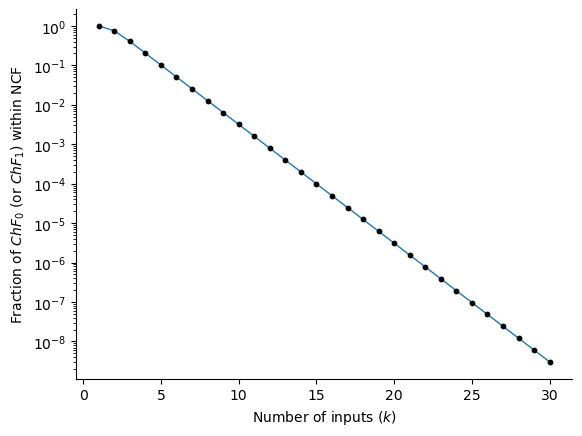

In [95]:
#------------------------------------------------------------------------------------------------------------------
# Using the above functions we have a frac_list consiting of the fraction of chain/ncf upto 30 inputs
#------------------------------------------------------------------------------------------------------------------
with open ('data/frac_list.pkl','rb') as f:
    frac_list=pkl.load(f)
fig, ax = plt.subplots()
K=np.arange(1,31)
ax.semilogy(K, frac_list,zorder=0,linewidth=1)
ax.scatter(K, frac_list,s=10,color='black',zorder=1)
ax.set_xlabel('Number of inputs ' r'$(k)$')
ax.set_ylabel('Fraction of ' r'$ChF_0$ ''(or 'r'$ChF_1$) ' 'within NCF')
ax.spines[['right', 'top']].set_visible(False)
plt.show()
#plt.savefig('Theoretical fraction of NCF.pdf',dpi=300)

# b)Bias distribution plot

In [96]:
#------------------------------------------------------------------------------------------------------------------
# Define a function for generating all odd numbers(bias) from 1 upto 2**k-1 
#------------------------------------------------------------------------------------------------------------------
def xlist(k):
    xlist=np.arange(1,2**k+1,2)
    return xlist

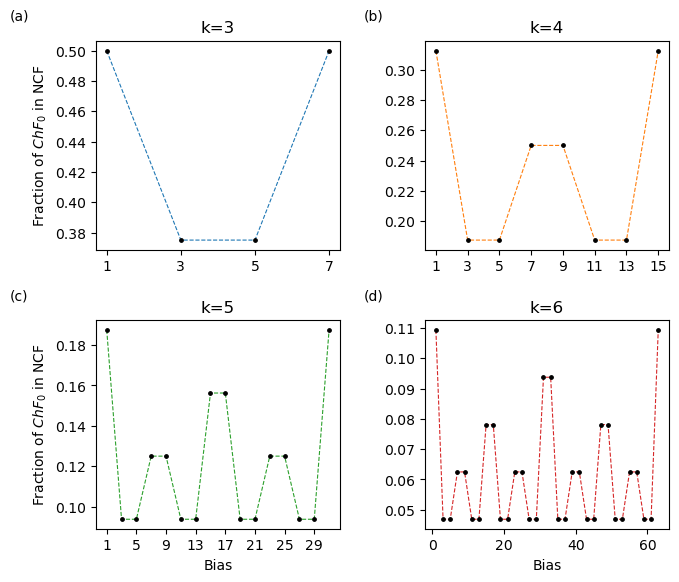

In [97]:
#------------------------------------------------------------------------------------------------------------------
# Obtain the plot for fraction of chain functions within NCF biaswise
#------------------------------------------------------------------------------------------------------------------
with open ('data/fracdict.pkl','rb') as f:
    fracdict=pkl.load(f)
fig, axs = plt.subplots(2, 2,figsize=(7, 6))
fig.tight_layout(pad=3.0)
axs[0, 0].scatter(xlist(3), fracdict[3],s=6,color='black', zorder=1)
axs[0, 0].plot(xlist(3), fracdict[3], linewidth=0.8,linestyle='dashed',zorder=0)
axs[0, 0].set_title('k=3')
axs[0, 0].set( ylabel='Fraction of ' r'$ChF_0$ ' 'in NCF')
axs[0, 0].set_xticks(xlist(3))
axs[0, 1].scatter(xlist(4), fracdict[4],s=6,color='black',zorder=1)
axs[0, 1].plot(xlist(4), fracdict[4], 'tab:orange',linewidth=0.8,linestyle='dashed',zorder=0)
axs[0, 1].set_title('k=4')
axs[0, 1].set_xticks(xlist(4))
axs[1, 0].scatter(xlist(5), fracdict[5],s=6,color='black',zorder=1)
axs[1, 0].plot(xlist(5), fracdict[5],'tab:green',linewidth=0.8,zorder=0,linestyle='dashed')
axs[1, 0].set_title('k=5')
axs[1, 0].set(xlabel='Bias',ylabel='Fraction of ' r'$ChF_0$ ' 'in NCF')
axs[1, 0].set_xticks(np.arange(1,32,4))
axs[1, 1].scatter(xlist(6), fracdict[6],s=6,color='black',zorder=1)
axs[1, 1].plot(xlist(6), fracdict[6],'tab:red', linewidth=0.8,zorder=0,linestyle='dashed')
axs[1, 1].set_title('k=6')
axs[1, 1].set(xlabel='Bias')
axs = axs.flat
print(enumerate(axs))
for n, ax in enumerate(axs):  
    if n%2==0:
        ax.text(-0.35, 1.1, '('+string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=10)
    else:
         ax.text(-0.25, 1.1, '('+string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=10)
plt.show()
#plt.savefig('data/bias.pdf',bbox_inches='tight',dpi=300)

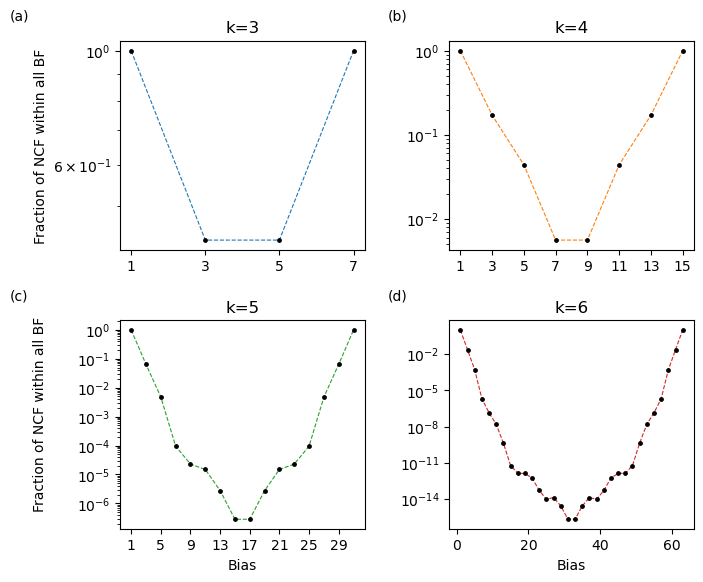

In [98]:
#------------------------------------------------------------------------------------------------------------------
# Obtain the plot for fraction of NCFs within all functions biaswise
#------------------------------------------------------------------------------------------------------------------
with open ('data/fracdict2.pkl','rb') as f:
    fracdict2=pkl.load(f)
fig, axs = plt.subplots(2, 2,figsize=(7, 6))
fig.tight_layout(pad=3.0)
axs[0, 0].scatter(xlist(3), fracdict2[3],s=6,color='black',zorder=1)
axs[0, 0].semilogy(xlist(3), fracdict2[3], linestyle='dashed',linewidth=0.8,zorder=0)
axs[0, 0].set_title('k=3')
axs[0, 0].set( ylabel='Fraction of NCF within all BF')
axs[0, 0].set_xticks(xlist(3))
axs[0, 1].scatter(xlist(4), fracdict2[4],s=6,color='black',zorder=1)
axs[0, 1].semilogy(xlist(4), fracdict2[4], 'tab:orange',linestyle='dashed',linewidth=0.8,zorder=0)
axs[0, 1].set_title('k=4')
axs[0, 1].set_xticks(xlist(4))
axs[1, 0].scatter(xlist(5), fracdict2[5],s=6,color='black',zorder=1)
axs[1, 0].semilogy(xlist(5), fracdict2[5],'tab:green', linestyle='dashed',linewidth=0.8,zorder=0)
axs[1, 0].set_title('k=5')
axs[1, 0].set(xlabel='Bias')
axs[1, 0].set_xticks(np.arange(1,32,4))
axs[1, 1].scatter(xlist(6), fracdict2[6],s=6,color='black',zorder=1)
axs[1, 1].semilogy(xlist(6), fracdict2[6],'tab:red', linestyle='dashed',linewidth=0.8,zorder=0)
axs[1, 1].set_title('k=6')
axs[1, 1].set(xlabel='Bias')
fig.text( -0.02, 0.3,'Fraction of NCF within all BF', va='center', rotation='vertical')
axs=axs.flat
for n, ax in enumerate(axs):  
    if n%2==0:
        ax.text(-0.45, 1.1, '('+string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=10)
    else:
         ax.text(-0.25, 1.1, '('+string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=10)
plt.show()
#plt.savefig('biasdistNCF.pdf',bbox_inches='tight',dpi=300)

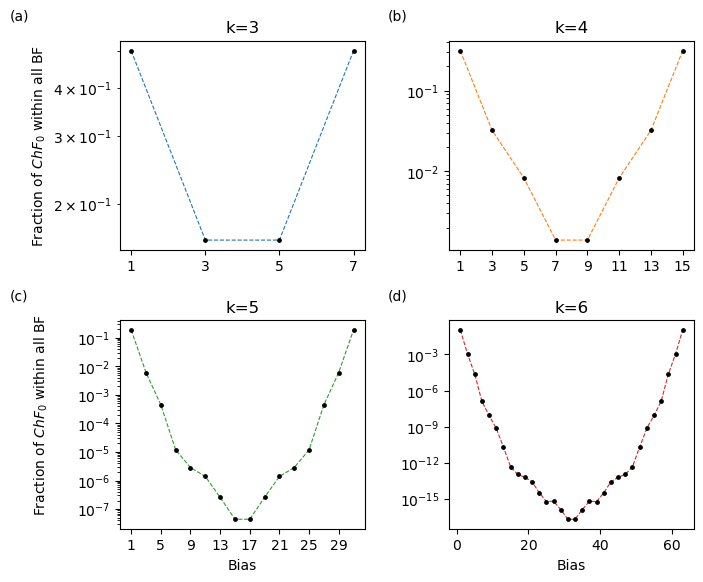

In [78]:
#------------------------------------------------------------------------------------------------------------------
# Obtain the plot for fraction of chain functions within all functions biaswise
#------------------------------------------------------------------------------------------------------------------
with open ('data/fracdict3.pkl','rb') as f:
    fracdict3=pkl.load(f)
fig, axs = plt.subplots(2, 2,figsize=(7, 6))
fig.tight_layout(pad=3.0)
axs[0, 0].scatter(xlist(3), fracdict3[3],s=6,color='black',zorder=1)
axs[0, 0].semilogy(xlist(3), fracdict3[3], linestyle='dashed',linewidth=0.8,zorder=0)
axs[0, 0].set_title('k=3')
axs[0, 0].set( ylabel='Fraction of ' r'$ChF_0$'' within all BF')
axs[0, 0].set_xticks(xlist(3))
axs[0, 1].scatter(xlist(4), fracdict3[4],s=6,color='black',zorder=1)
axs[0, 1].semilogy(xlist(4), fracdict3[4], 'tab:orange',linestyle='dashed',linewidth=0.8,zorder=0)
axs[0, 1].set_title('k=4')
axs[0, 1].set_xticks(xlist(4))
axs[1, 0].scatter(xlist(5), fracdict3[5],s=6,color='black',zorder=1)
axs[1, 0].semilogy(xlist(5), fracdict3[5],'tab:green', linestyle='dashed',linewidth=0.8,zorder=0)
axs[1, 0].set_title('k=5')
axs[1, 0].set(xlabel='Bias')
axs[1, 0].set_xticks(np.arange(1,32,4))
axs[1, 1].scatter(xlist(6), fracdict3[6],s=6,color='black',zorder=1)
axs[1, 1].semilogy(xlist(6), fracdict3[6],'tab:red', linestyle='dashed',linewidth=0.8,zorder=0)
axs[1, 1].set_title('k=6')
axs[1, 1].set(xlabel='Bias')
fig.text( -0.02, 0.3,'Fraction of ' r'$ChF_0$'' within all BF', va='center', rotation='vertical')
axs=axs.flat
for n, ax in enumerate(axs):  
    if n%2==0:
        ax.text(-0.45, 1.1, '('+string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=10)
    else:
         ax.text(-0.25, 1.1, '('+string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=10)
plt.savefig('data/biasdistchain.pdf',bbox_inches='tight',dpi=300)

# Empirical codes

# a)BBM Dataset analyses

In [99]:
#------------------------------------------------------------------------------------------------------------------
# Generating data for plotting enrichment of NCFs in the BBM dataset
#------------------------------------------------------------------------------------------------------------------
df=pd.read_csv('data/Expected_enrichment_data.tsv', sep = '\t')
df1 = pd.read_csv('data/biodivine_reference_5990_final.tsv', sep = '\t')
NCF_theo=list(df['NCF'])
theor_frac_chain_0= list(df['enrich_chain_in_NCF'])
theor_frac_chain_1=list(df['enrich_chain1_in_NCF'])
theor_frac_union=list(df['enrich_chain_unions_in_NCF'])
theor_frac_neither=[1-x for x in theor_frac_union]
K = list(df1['k'])
inputs=list(set(K))
NCF=list(df1['NCF'])
Chain_0=list(df1['Chain'])
Chain_1=list(df1['Chain_1'])
Chain_U=list(df1['Chain-U'])
freq=[K[i]for i in range(len(K))]
freqNCF=[K[i]for i in range(len(K)) if NCF[i]==True]
freq_Chain=[K[i]for i in range(len(K)) if Chain_0[i]==True]
freq_Chain_1=[K[i]for i in range(len(K)) if Chain_1[i]==True]
freq_Union=[K[i]for i in range(len(K)) if Chain_U[i]==True]
count=[freq.count(i) for i in inputs]
countNCF=[freqNCF.count(i) for i in inputs] 
count_Chain=[freq_Chain.count(i) for i in inputs]
count_Chain_1=[freq_Chain_1.count(i) for i in inputs]
count_union=[freq_Union.count(i) for i in inputs]
frac_ncf_theor=[NCF_theo[i]/2**(2**(i+1)) for i in range(len(NCF_theo))]
frac_ncf_emp=[countNCF[i]/count[i] for i in range(len(countNCF))]
y=countNCF
x=count_Chain
z=count_Chain_1
w=count_union
frac_chain=[x[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(countNCF))]
frac_chain_1=[z[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(countNCF))]
frac_union=[w[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(countNCF))]
frac_neither=[1-frac_union[i] if type(frac_union[i])== float else 'NCF is 0' for i in range(len(frac_union))]

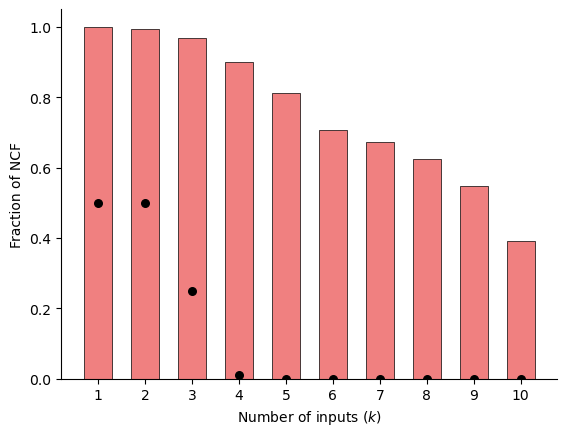

In [80]:
#------------------------------------------------------------------------------------------------------------------
# Plotting enrichment of NCFs in the BBM dataset
#------------------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.bar(inputs,frac_ncf_emp,color='lightcoral',label='Empirical',edgecolor='black',linewidth=0.5,width=0.6)
ax.scatter(inputs,frac_ncf_theor,s=30, c='black',label='Theoretical')
ax.set_xlabel('Number of inputs ' r'$(k)$')
ax.set_ylabel('Fraction of NCF')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(inputs)
#ax.legend(frameon=False)
#plt.savefig('NCF_enrichment.pdf',dpi=300)
plt.show()

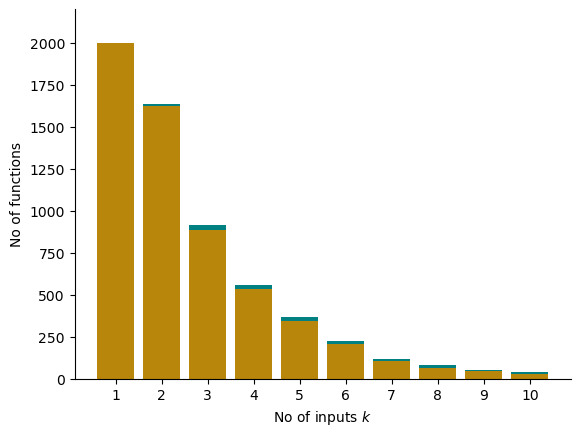

List of number of even bias functions for each k [0, 11, 29, 22, 23, 19, 14, 15, 10, 10]
List of number of odd bias functions for each k [1998, 1625, 886, 536, 343, 205, 105, 65, 43, 31]


In [100]:
#------------------------------------------------------------------------------------------------------------------
# odd,even bias stack plot of the BBM dataset
#------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('data/biodivine_reference_5990_final.tsv', sep = '\t')
bias=list(df['bias'])
def even_func(k):
    even_bias=[bias[i] for i in range(len(bias)) if K[i]==k and bias[i]%2==0 ]
    return even_bias
def odd_func(k):
    odd_bias=[bias[i] for i in range(len(bias)) if K[i]==k and bias[i]%2==1 ]
    return odd_bias
even_bias_count=[len(even_func(k)) for k in inputs]
odd_bias_count=[len(odd_func(k)) for k in inputs]
fig,ax=plt.subplots()
x_bar=ax.bar(inputs,odd_bias_count, color='darkgoldenrod',label='odd bias')
y_bar=ax.bar(inputs,even_bias_count, color='teal',bottom=odd_bias_count,label='even bias')
ax.set_xlabel('No of inputs ' r'$k$')
ax.set_ylabel('No of functions')
ax.set_xticks(inputs)
ax.set_ylim([0, 2200])
ax.spines[['right', 'top']].set_visible(False)
#fig.savefig('Bias_even_odd.pdf',dpi=300)
plt.show()
#printing the odd and even axis lists
print('List of number of even bias functions for each k',even_bias_count)
print('List of number of odd bias functions for each k',odd_bias_count)
#These are the numbers put above via illustrator

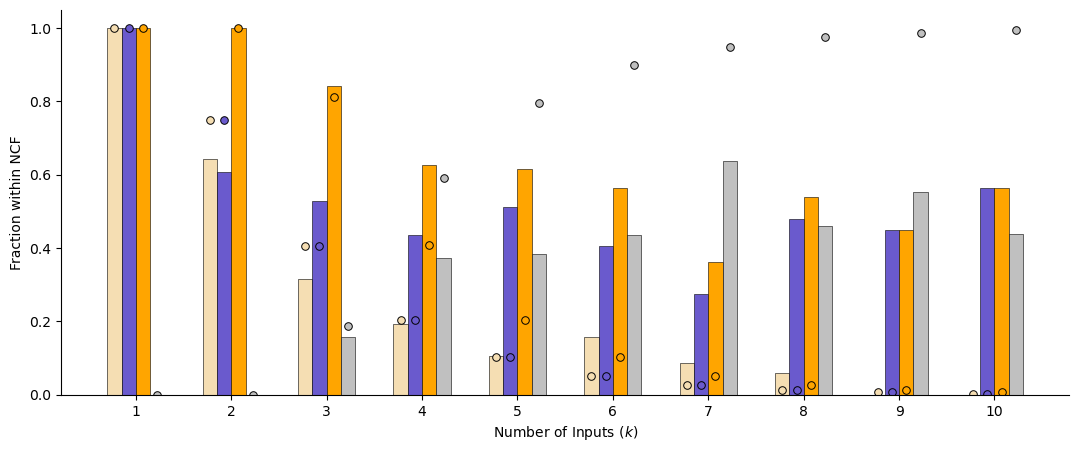

In [101]:
#------------------------------------------------------------------------------------------------------------------
# Enrichment analysis plots for BBM dataset
#------------------------------------------------------------------------------------------------------------------
j=np.arange(1,11)
width=0.15
fig, ax = plt.subplots(figsize=(13, 5))
ax.bar(j-0.225,frac_chain[0:10],width,color='wheat',label=r'$ChF_0$',edgecolor='black',linewidth=0.4)
ax.scatter(j-0.225,theor_frac_chain_0[0:10],s=30, c='wheat',edgecolors='black',linewidths=0.7)


ax.bar(j-0.075,frac_chain_1[0:10],width,color='slateblue',label=r'$ChF_1$',edgecolor='black',linewidth=0.4)
ax.scatter(j-0.075,theor_frac_chain_1[0:10],s=30, c='slateblue',edgecolors='black',linewidths=0.7)


ax.bar(j+0.075,frac_union[0:10],width,color='orange',label=r'$ChF_u$',edgecolor='black',linewidth=0.4)
ax.scatter(j+0.075,theor_frac_union[0:10],s=30, c='orange',edgecolors='black',linewidths=0.7)

ax.bar(j+0.225,frac_neither[0:10],width,color='silver',label=r'$non-ChF_u$ $NCF$',edgecolor='black',linewidth=0.4)
ax.scatter(j+0.225,theor_frac_neither[0:10],s=30, c='silver',edgecolors='black',linewidths=0.7)


ax.set_xticks(np.arange(1,11))

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Fraction within NCF')
ax.set_xlabel('Number of Inputs 'r'$(k)$')
plt.show()


In [102]:
#------------------------------------------------------------------------------------------------------------------
#Data generation for 2687 dataset
#------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('data/Reference_biological_dataset_final.tsv', sep = '\t')
K = list(df['k'])
inputs=list(set(K))
NCF=list(df['NCF'])
Chain=list(df['Chain'])
Chain_1=list(df['Chain_1'])
Union=list(df['Chain_U'])
freqNCF=[K[i]for i in range(len(K)) if NCF[i]==True]
freq_Chain=[K[i]for i in range(len(K)) if Chain[i]==True]
freq_Chain_1=[K[i]for i in range(len(K)) if Chain_1[i]==True]
freq_Union=[K[i]for i in range(len(K)) if Union[i]==True]
countNCF=[freqNCF.count(i) for i in inputs] 
count_Chain=[freq_Chain.count(i) for i in inputs]
count_Chain_1=[freq_Chain_1.count(i) for i in inputs]
count_union=[freq_Union.count(i) for i in inputs]
y=countNCF
x=count_Chain
z=count_Chain_1
w=count_union
frac_chain_mcbf=[x[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(countNCF))]
frac_chain_1_mcbf=[z[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(countNCF))]
frac_union_mcbf=[w[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(countNCF))]
frac_neither_mcbf=[1-frac_union_mcbf[i] if type(frac_union_mcbf[i])== float else 'NCF is 0' for i in range(len(frac_union_mcbf))]

In [103]:
#------------------------------------------------------------------------------------------------------------------
#Data generation for Harris dataset
#------------------------------------------------------------------------------------------------------------------
df=pd.read_csv('data/Harris_dataset.tsv', sep = '\t')
inputs=list(df['No of inputs'])
NCF=list(df['NCF'])
Chain=list(df['Chain'])
Chain_1=list(df['Chain_1'])
freq=list(df['nobs'])  
def freq_NCF(k):
    freq_NCF=0
    for i in range(len(NCF)):
        if NCF[i]== True and inputs[i]==k:
            freq_NCF+=freq[i]
    return freq_NCF
def freq_chain(k):
    freq_chain=0
    for i in range(len(Chain)):
        if Chain[i]== True and inputs[i]==k:
            freq_chain+=freq[i]
    return freq_chain
def freq_chain_1(k):
    freq_chain_1=0
    for i in range(len(Chain_1)):
        if Chain_1[i]== True and inputs[i]==k:
            freq_chain_1+=freq[i]
    return freq_chain_1
def freq_union(k):
    freq_both=0
    for i in range(len(Chain_1)):
        if (Chain[i]== True or Chain_1[i]==True) and inputs[i]==k:
            freq_both+=freq[i]
    return freq_both
def freq_neither(k):
    freq_neither=0
    for i in range(len(Chain_1)):
        if Chain[i]== False and Chain_1[i]==False and NCF[i]==True and inputs[i]==k:
            freq_neither+=freq[i]
    return freq_neither

freq_NCF_list=[freq_NCF(k) for k in range(1,6)]
freq_chain_list=[freq_chain(k) for k in range(1,6)]
freq_chain_1_list=[freq_chain_1(k) for k in range(1,6)]
freq_union_list=[freq_union(k) for k in range(1,6)]
freq_neither_list=[freq_neither(k) for k in range(1,6)]

y=freq_NCF_list
x=freq_chain_list
z=freq_chain_1_list
w=freq_union_list
frac_chain_Harris=[x[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(freq_chain_list))]
frac_chain_1_Harris=[z[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(freq_chain_list))]
frac_union_Harris=[w[i]/y[i] if y[i] != 0 else 'NCF is 0'for i in range(len(freq_chain_list))]
frac_neither_Harris=[1-frac_union_Harris[i] if type(frac_union_Harris[i])== float else 'NCF is 0' for i in range(len(frac_union_Harris))]

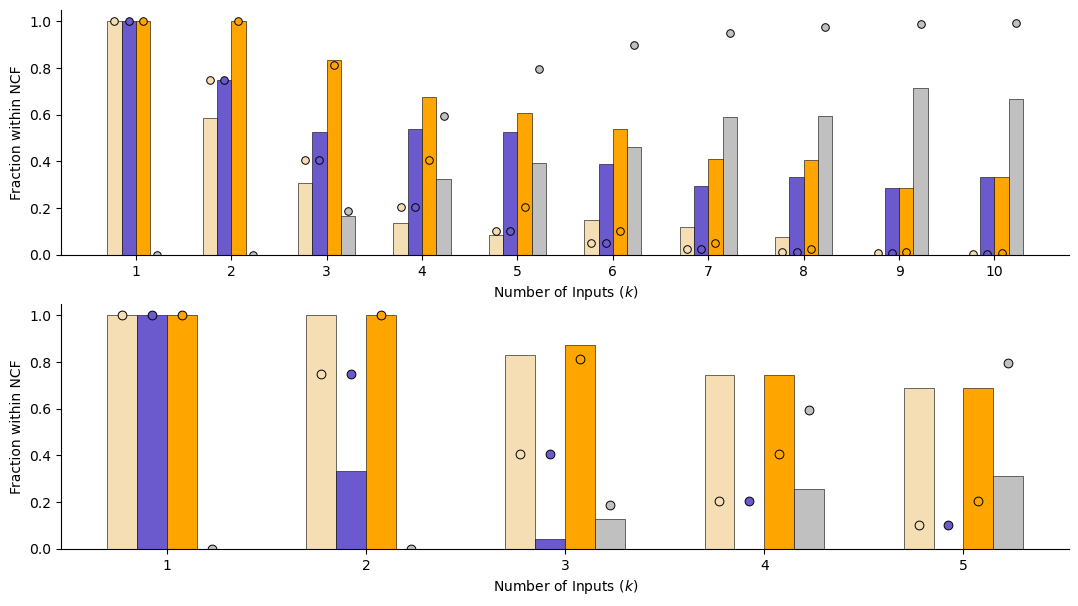

In [104]:
j=np.arange(1,11)
width=0.15
fig.tight_layout(pad=3.0)
fig, axs = plt.subplots(2,1,figsize=(13, 7))
axs[0].bar(j-0.225,frac_chain_mcbf[0:10],width,color='wheat',label=r'$ChF_0$',edgecolor='black',linewidth=0.4)
axs[0].scatter(j-0.225,theor_frac_chain_0[0:10],s=30, c='wheat',edgecolors='black',linewidths=0.7)


axs[0].bar(j-0.075,frac_chain_1_mcbf[0:10],width,color='slateblue',label=r'$ChF_1$',edgecolor='black',linewidth=0.4)
axs[0].scatter(j-0.075,theor_frac_chain_1[0:10],s=30, c='slateblue',edgecolors='black',linewidths=0.7)


axs[0].bar(j+0.075,frac_union_mcbf[0:10],width,color='orange',label=r'$ChF_u$',edgecolor='black',linewidth=0.4)
axs[0].scatter(j+0.075,theor_frac_union[0:10],s=30, c='orange',edgecolors='black',linewidths=0.7)

axs[0].bar(j+0.225,frac_neither_mcbf[0:10],width,color='silver',label=r'$non-ChF_u$ $NCF$',edgecolor='black',linewidth=0.4)
axs[0].scatter(j+0.225,theor_frac_neither[0:10],s=30, c='silver',edgecolors='black',linewidths=0.7)


axs[0].set_xticks(np.arange(1,11))
axs[0].spines[['right', 'top']].set_visible(False)
axs[0].set_ylabel('Fraction within NCF')
axs[0].set_xlabel('Number of Inputs 'r'$(k)$')
m=np.arange(1,6)
width=0.15
axs[1].bar(m-0.225,frac_chain_Harris,width,color='wheat',label=r'$ChF_0$',edgecolor='black',linewidth=0.4)
axs[1].scatter(m-0.225,theor_frac_chain_0[0:5],s=40, c='wheat',edgecolors='black',linewidths=0.7)

axs[1].bar(m-0.075,frac_chain_1_Harris,width,color='slateblue',label=r'$ChF_1$',edgecolor='black',linewidth=0.4)
axs[1].scatter(m-0.075,theor_frac_chain_1[0:5],s=40, c='slateblue',edgecolors='black',linewidths=0.7)


axs[1].bar(m+0.075,frac_union_Harris,width,color='orange',label=r'$ChF_u$',edgecolor='black',linewidth=0.4)
axs[1].scatter(m+0.075,theor_frac_union[0:5],s=40, c='orange',edgecolors='black',linewidths=0.7)

axs[1].bar(m+0.225,frac_neither_Harris,width,color='silver',label=r'$non-ChF_u$ $NCF$',edgecolor='black',linewidth=0.4)
axs[1].scatter(m+0.225,theor_frac_neither[0:5],s=40, c='silver',edgecolors='black',linewidths=0.7)


axs[1].set_xticks(np.arange(1,6))
axs[1].spines[['right', 'top']].set_visible(False)
axs[1].set_ylabel('Fraction within NCF')
axs[1].set_xlabel('Number of Inputs 'r'$(k)$')
plt.show()
#plt.savefig('final_figure/2687_enrichment.pdf',dpi=300)